-----------------------------------------------------
# Game of Thrones dataset analysis
-----------------------------------------------------
It's a homework of FDA course.(HW1 PART2)
>dataset: https://www.kaggle.com/mylesoneill/game-of-thrones <br><br>
As a fan of the sereis 'Game of Thrones', I'm excited to find some insight to this dataset.

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Using Pandas to read data from csv files

In [3]:
battles = pd.read_csv('./gameofthrone_dataset/battles.csv')
deaths = pd.read_csv('./gameofthrone_dataset/character-deaths.csv')

------
## 1. 'battles.csv'
We first take a look at the data 'battles.csv'.

In [4]:
type(battles)

pandas.core.frame.DataFrame

In [5]:
battles.head(3)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN


In [6]:
battles.shape

(38, 25)

In [7]:
battles.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

## See the correlation of the numeric columns
We see that attacker size and defender size have high relation.

In [8]:
corr_of_battles = battles.describe(include=[np.number])  #Including only numeric columns in a DataFrame description.
corr_of_battles = corr_of_battles.drop("defender_3",axis=1)
corr_of_battles = corr_of_battles.drop("defender_4",axis=1)
corr_of_battles = corr_of_battles.drop("summer",axis=1)

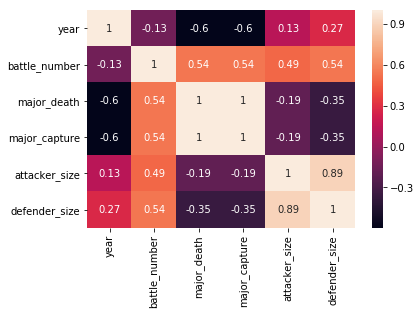

In [9]:
sns.heatmap(corr_of_battles.corr(),annot=True)

## Filter some uncompleted data, and remain those that might be helpful.

In [10]:
battles = battles[['name','year','attacker_king','defender_king',
         'battle_type','attacker_commander','defender_commander',
         'location','attacker_outcome']]

## See the relation of attacker_king and defender_king
We can see that the Stark and Baratheon have the most fights,<br>
which is reasonable after all, because the two families are main roles.    

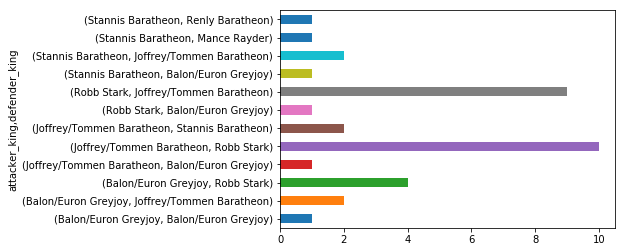

In [11]:
battles.groupby(['attacker_king', 'defender_king']).count()['name'].plot(kind = 'barh') 
# I use pandas.dataframe.groupby to count the number of the fights, and then plot them.
# ‘barh’ : horizontal bar plot

## Practice WordCloud
I try to use a wordcloud to see whether there is an attacker_king with a high frequency.

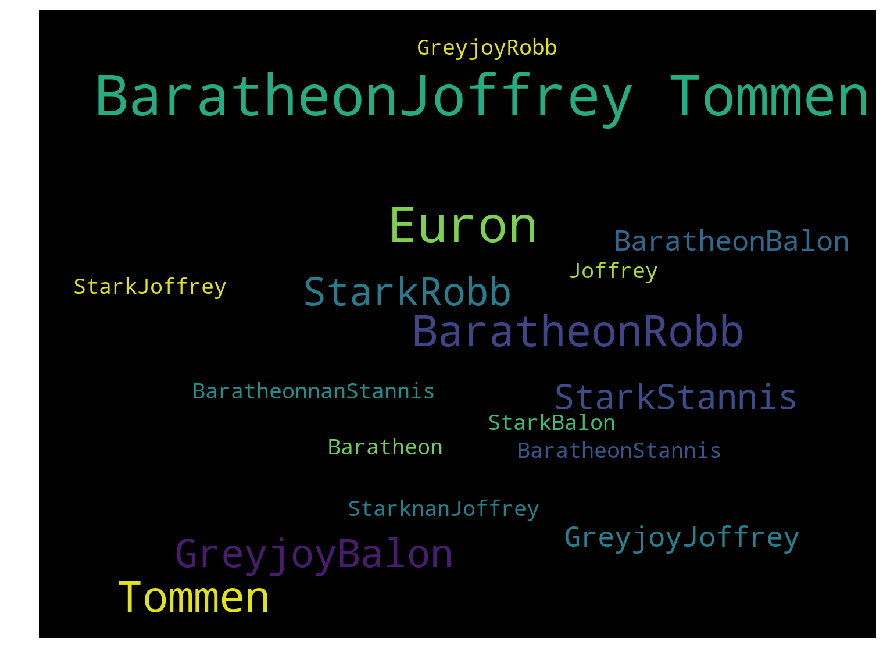

In [49]:
from wordcloud import WordCloud

attackers2 = battles['attacker_king'].values.tolist()
attackers2 = ''.join(str(x) for x in attackers2)

cloud = WordCloud(width=1440, height=1080, relative_scaling=0.5).generate(attackers2)
plt.figure(figsize=(15, 15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

----
## 2. 'character-deaths.csv'

In [12]:
type(deaths)

pandas.core.frame.DataFrame

this data records all the dead people in Book1~Book5 (col: 'GoT' 'CoK' 'SoS' 'FfC' 'DwD')
><br>Allegiances -> the family that the person keep faith to 
<br>Death Year -> that person's death year in the story
<br>Book of Death -> the book the person died in
<br>Death Chapter -> the chapter the person died in
<br>Book Intro Chapter -> the Chapter that the person first appear

In [14]:
deaths.head(3)

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1


## Compare the number of deaths in each book.

<BarContainer object of 5 artists>

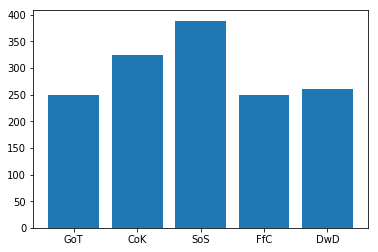

In [21]:
Book1 = deaths['GoT'].sum()
Book2 = deaths['CoK'].sum()
Book3 = deaths['SoS'].sum()
Book4 = deaths['FfC'].sum()
Book5 = deaths['DwD'].sum()
BookDeath = [Book1, Book2, Book3, Book4, Book5]
Book = ['GoT', 'CoK', 'SoS', 'FfC', 'DwD']
plt.bar(Book, BookDeath)

## Scatter the death in each chapter of different allegiances
We can see that the night's watch died very often in all chapters.
<br>And the Stark died in the middle of the chapters. 
<br>Hope that the deaths of Stark will then be none in next season!

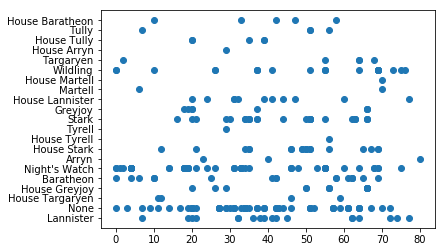

In [47]:
list1 = deaths['Allegiances'].tolist()
list2 = deaths['Death Chapter'].tolist()
allegiances = pd.DataFrame(
    {"Allegiances": list1,
     "Death Chapter": list2
    }
)
# print(allegiances)
plt.scatter(y = 'Allegiances', x = 'Death Chapter', data = allegiances)